<a href="https://colab.research.google.com/github/Akshhxt/TensorFlow/blob/main/Neural_Network_Classification_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introdution to Neural Network Classification in TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


# Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# check out the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

#A few types of classification problems:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Visualizing our Data

In [5]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [6]:

# Check out the different labels
circles.label.value_counts()


1    500
0    500
Name: label, dtype: int64

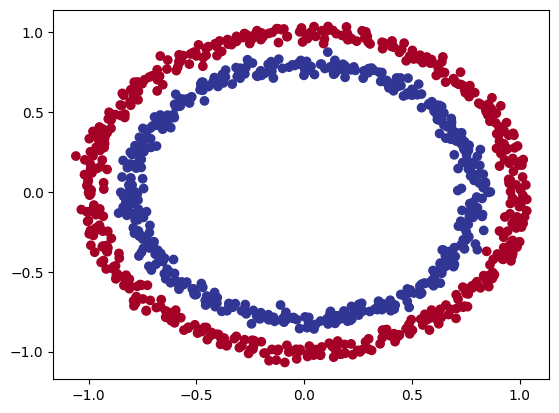

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [8]:
# Check the shapes
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# How many samples are we working on?
len(X), len(y)

(1000, 1000)

In [10]:
#View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling
* 1. Creating a model
* 2. Compiling the model
* 3. Fitting the model
* 4. Evaluate the model

In [11]:
# Set a random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model

model_1.fit(X, y, epochs=200, verbose=0)

# 4. Evaluate the model

model_1.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Even after 200 passes of the data, it's still performing as if it's guessing.

What if we added an extra layer and trained for a little longer?

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=200, verbose=0) # set verbose=0 to make the output print less


# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5000


[0.6943238377571106, 0.5]

## Improving the model

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0) # fit for 100 passes of the data

# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5040


[0.6945180892944336, 0.5040000081062317]

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

* Takes in a trained model, features (X) and labels (y).
* Creates a meshgrid of the different X values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls).

In [14]:
import numpy as np

def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation


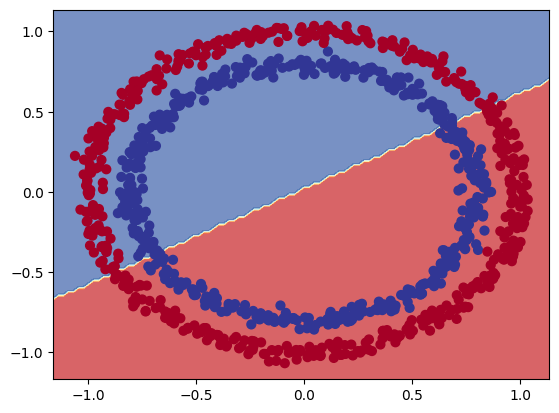

In [15]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

In [16]:
import numpy as np
import tensorflow as tf

# Set random seed for reproducibility
tf.random.set_seed(42)

# Generate some sample regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split the data into train and test sets
X_reg_train = X_regression[:150].reshape(-1, 1)  # Reshape to make it 2D
X_reg_test = X_regression[150:].reshape(-1, 1)
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Import Sequential and Dense from tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model_3 = Sequential([
    Dense(64, input_shape=(1,), activation='relu'),  # Input shape is 1D
    Dense(1)  # Output layer for regression
])

# Compile the model
model_3.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_3.fit(X_reg_train, y_reg_train, epochs=100, verbose=1)


Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 237669.7656
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 214468.0000
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 194153.5000
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 174703.4375
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 156748.0469
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 139705.9375
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 124333.1172
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 110599.3516
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 98106.3828
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 86136.0391
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 75231.0938
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 65319.2344
Epoch

In [17]:
model_3.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                128       
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 493.3403 - mae: 493.3403
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 376.0730 - mae: 376.0730
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 298.2052 - mae: 298.2052
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 259.3195 - mae: 259.3195
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 257.9406 - mae: 257.9406
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 263.9435 - mae: 263.9435
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 260.0556 - mae: 260.0556
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 255.1300 - mae: 255.1300
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 259.0819 - mae: 259.0819
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 256.8383 - mae: 256.8383
Epoch 11/100
5/5 [=====================

2/2 [==============================] - 0s 6ms/step


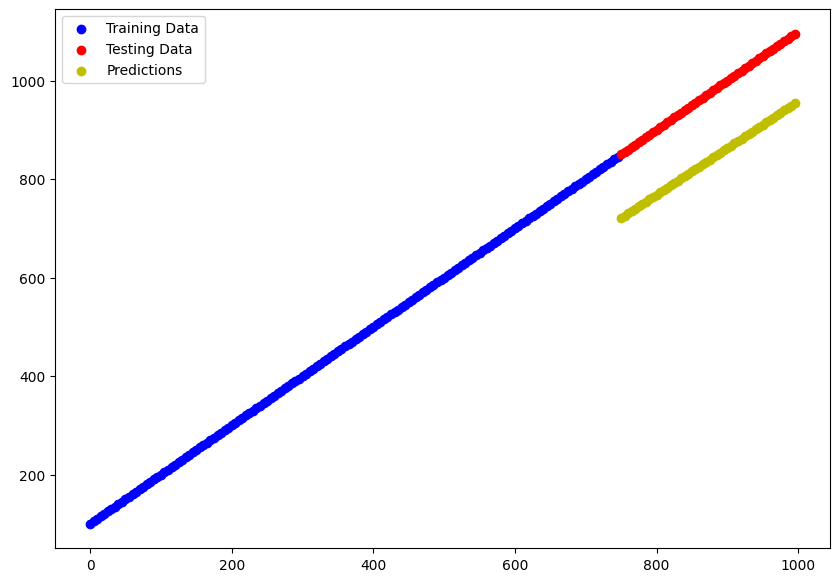

In [19]:
y_reg_preds = model_3.predict(X_reg_test)
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training Data')
plt.scatter(X_reg_test, y_reg_test, c='r', label='Testing Data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='y', label='Predictions')
plt.legend();

The missing piece: Non-linearity

In [20]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 6ms/step - loss: 4.3015 - accuracy: 0.4660
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 4.1677 - accuracy: 0.4670
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1230 - accuracy: 0.4660
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 4.0442 - accuracy: 0.4670
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 3.9558 - accuracy: 0.4650
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 3.8456 - accuracy: 0.4680
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7176 - accuracy: 0.4690
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 3.6204 - accuracy: 0.4690
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 3.5942 - accuracy: 0.4680
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 3.4855 - accuracy: 0.4680
Epoch 11/

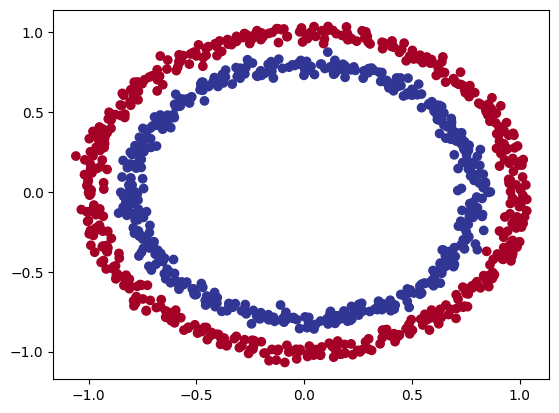

In [22]:
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 4ms/step
doing binary classifcation


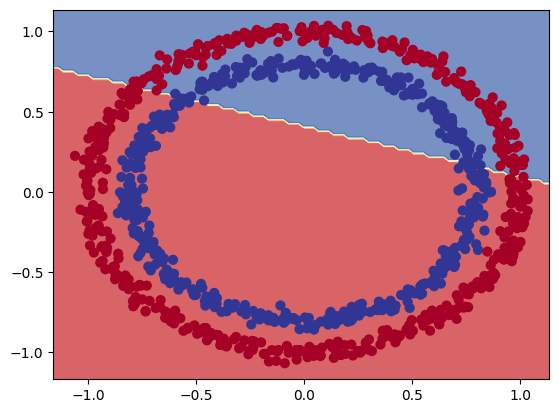

In [24]:
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

## Building the neural network with a non-linear function

In [26]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),

])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 10ms/step - loss: 5.7457 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 5.7284 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 5.7155 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 5.6166 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 5.5958 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 5.5793 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 5.5638 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 5.4878 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 5.2798 - accuracy: 0.4810
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 5.1441 - accuracy: 0.4830
Epoch 11

Upgrading our non-linear model with more layers

In [27]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.7461 - accuracy: 0.4750
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3846 - accuracy: 0.4770
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1062 - accuracy: 0.4710
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0499 - accuracy: 0.4700
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0111 - accuracy: 0.4710
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9815 - accuracy: 0.4690
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9580 - accuracy: 0.4710
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9374 - accuracy: 0.4700
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9206 - accuracy: 0.4670
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9058 - accuracy: 0.4560
Epoch 11/

In [28]:

# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6500 - accuracy: 0.5570


[0.650020182132721, 0.5569999814033508]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation


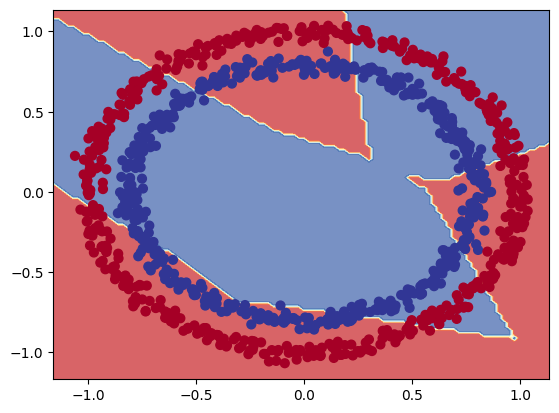

In [29]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)

This time we'll change the activation function on our output layer too. Remember the architecture of a classification model? For binary classification, the output layer activation is usually the Sigmoid activation function.

In [32]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)


In [33]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2637 - accuracy: 0.9860


[0.26367753744125366, 0.9860000014305115]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation


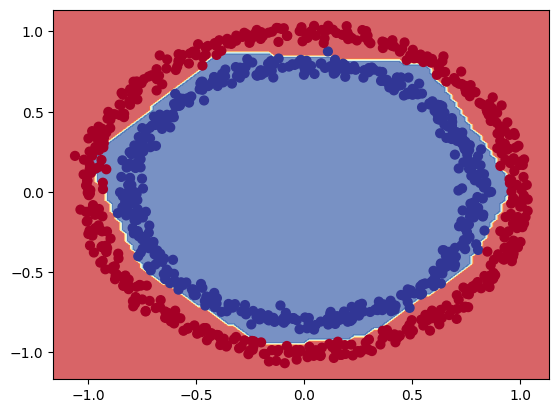

In [34]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, y)